# Try to understand Central Limit Theorem

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
replication_count = 1000
n_start = 100
n_stop = 1001
n_step = 400
ME = 1
DE = 1
sample_size_array = np.arange(n_start, n_stop, n_step)
count_rows = len(sample_size_array)
count_colums = replication_count

In [3]:
sample_sum_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)      # sum(sample)
sample_bar_n_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)    # sum(sample) / n
sample_sum_sqrt_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN) # sum(sample) / n^(1/2)
sample_sum_2_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)    # sum(sample) / n^2
CLT_matrix = np.full(shape=(count_rows, count_colums), fill_value=np.NaN)             # Central limit Theorem 
for row, n in enumerate(sample_size_array):
    for i in range(0, replication_count):
        sample = np.random.binomial(n = 1, p = 1/2, size = n) # normal(ME, DE, size = n) 
        
        sample_sum_matrix[row][i] = np.sum(sample)
        sample_bar_n_matrix[row, i] = np.sum(sample) / n
        sample_sum_2_matrix[row, i] = np.sum(sample) / n**2
        sample_sum_sqrt_matrix[row, i] = np.sum(sample) / np.sqrt(n)
        CLT_matrix[row, i] = (np.sum(sample) - n * 1/2) / np.sqrt(n)

In [4]:
def plot_hist(array, label='', title='', figsize=(7,4), color='green', fontsize=10, shadow=True, grid=True):
    plt.figure(figsize=figsize)
    if title != '':
        plt.title(title, fontsize=fontsize)
    if grid:
        plt.grid()
    plt.hist(array, color=color, label=label)
    plt.legend(loc='upper right', shadow=shadow, fontsize=fontsize)
    plt.show()

## sum(sample)

sample size = 100
mean = 50.024
var = 24.159424000000005


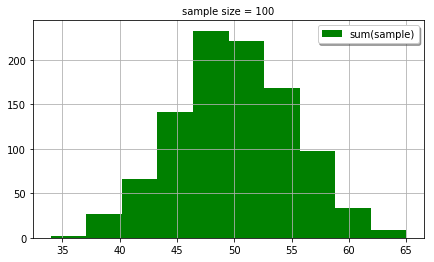

sample size = 500
mean = 249.763
var = 139.480831


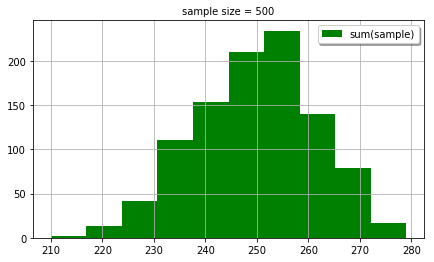

sample size = 900
mean = 449.58
var = 245.1996


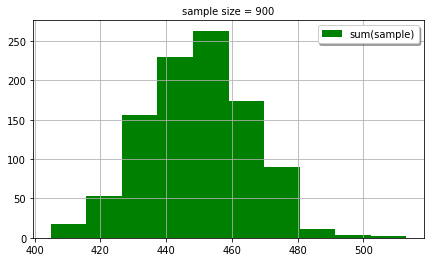

In [5]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_matrix[i]))
    print('var =', np.var(sample_sum_matrix[i]))
    plot_hist(array=sample_sum_matrix[i], label='sum(sample)', title='sample size = ' + str(n))

## sum(sample) / n

sample size = 100
mean = 0.50024
var = 0.0024159424


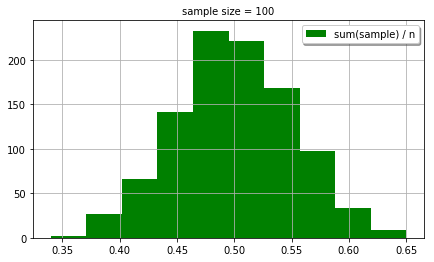

sample size = 500
mean = 0.499526
var = 0.0005579233240000005


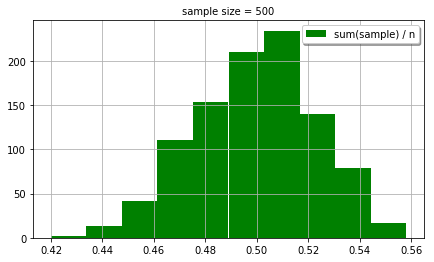

sample size = 900
mean = 0.4995333333333334
var = 0.0003027155555555555


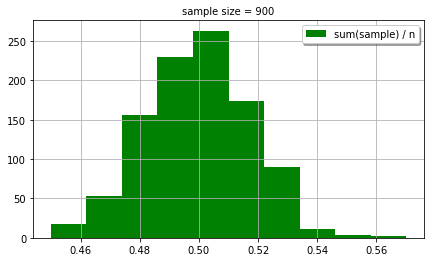

In [6]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_bar_n_matrix[i]))
    print('var =', np.var(sample_bar_n_matrix[i]))
    plot_hist(array=sample_bar_n_matrix[i], label='sum(sample) / n', title='sample size = ' + str(n))

## sum(sample) / n^(1/2)

sample size = 100
mean = 5.0024
var = 0.24159423999999996


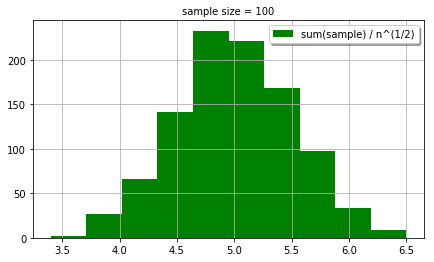

sample size = 500
mean = 11.169740925285598
var = 0.278961662


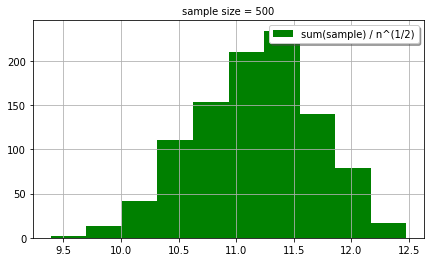

sample size = 900
mean = 14.986
var = 0.27244399999999996


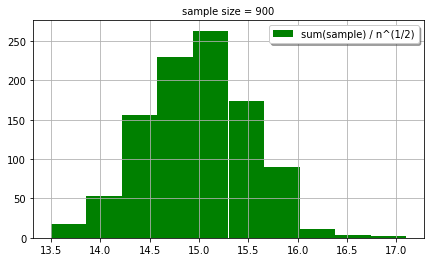

In [7]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_sqrt_matrix[i]))
    print('var =', np.var(sample_sum_sqrt_matrix[i]))
    plot_hist(array=sample_sum_sqrt_matrix[i], label='sum(sample) / n^(1/2)', title='sample size = ' + str(n))

## sum(sample) / n^2

sample size = 100
mean = 0.0050024
var = 2.4159424e-07


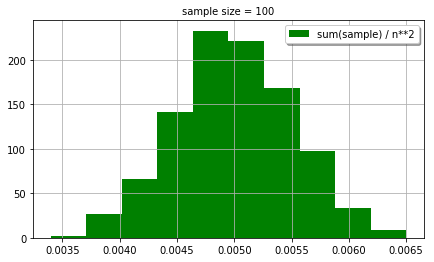

sample size = 500
mean = 0.000999052
var = 2.231693296e-09


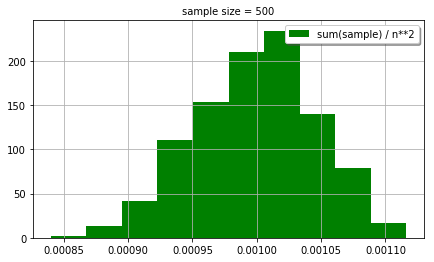

sample size = 900
mean = 0.000555037037037037
var = 3.737229080932783e-10


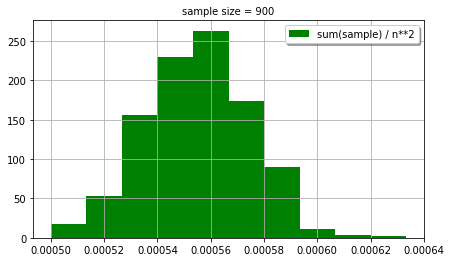

In [8]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(sample_sum_2_matrix[i]))
    print('var =', np.var(sample_sum_2_matrix[i]))
    plot_hist(array=sample_sum_2_matrix[i], label='sum(sample) / n**2', title='sample size = ' + str(n))

## Central limit Theorem

sample size = 100
mean = 0.0023999999999999968
var = 0.24159424000000002


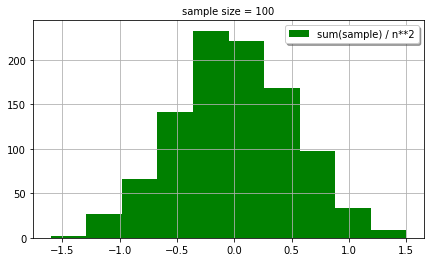

sample size = 500
mean = -0.010598962213349005
var = 0.278961662


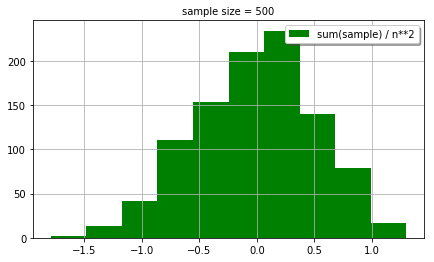

sample size = 900
mean = -0.014000000000000002
var = 0.27244399999999996


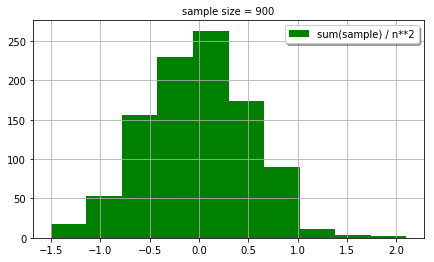

In [9]:
for i, n in enumerate(sample_size_array):
    print('sample size =', n)
    print('mean =', np.mean(CLT_matrix[i]))
    print('var =', np.var(CLT_matrix[i]))
    plot_hist(array=CLT_matrix[i], label='sum(sample) / n**2', title='sample size = ' + str(n))